In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from matplotlib import pyplot as plt

import copy
import csv

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'plane', 'car', 'bird'}
fg_used = '012'
fg1, fg2, fg3 = 0 , 1 , 2
background_classes = {'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

# print(type(foreground_classes))

In [0]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(5000):
  images, labels = dataiter.next()
  for j in range(batch_size):
    if(classes[labels[j]] in background_classes):
      img = images[j].tolist()
      background_data.append(img)
      background_label.append(labels[j])
    else:
      img = images[j].tolist()
      foreground_data.append(img)
      foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [0]:
def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img#.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

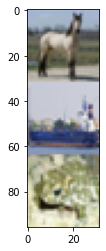

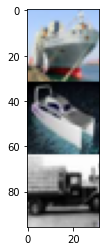

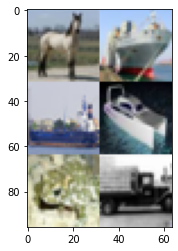

torch.Size([3, 96, 32])


In [0]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())


In [0]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
  """
  bg_idx : list of indexes of background_data[] to be used as background images in mosaic
  fg_idx : index of image to be used as foreground image from foreground data
  fg : at what position/index foreground image has to be stored out of 0-8
  """
  image_list=[]
  j=0
  for i in range(9):
    if i != fg:
      image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
      j+=1
    else: 
      image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
      label = foreground_label[fg_idx] 
  #image_list = np.concatenate(image_list ,axis=0)
  image_list = torch.stack(image_list) 
  return image_list,label

In [0]:
# background_label[34].item()
a = [1,2,3,3,4]
x = set()
x = set(a)
print(x, type(x))
x.add(6)
print(x,a)

{1, 2, 3, 4} <class 'set'>
{1, 2, 3, 4, 6} [1, 2, 3, 3, 4]


In [0]:
y = np.random.randint(0,35000,8)
print(y)
s=set(background_label[y].tolist())
s

[30162 29266 20326 20562 22395 18549 33202 12060]


{4, 6, 7, 8, 9}

In [0]:
a = np.random.randint(0,15000)
s.add(foreground_label[a].item())
s

{1, 4, 6, 7, 8, 9}

In [0]:
desired_num = 30000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
list_set_labels = [] 
for i in range(desired_num):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  mosaic_list_of_images.append(image_list)
  mosaic_label.append(label)
  list_set_labels.append(set_idx)


In [0]:
list_set_labels

[{2, 3, 5, 7, 8, 9},
 {0, 3, 4, 5, 6, 7, 8, 9},
 {2, 4, 5, 6, 8, 9},
 {0, 4, 5, 6, 8},
 {1, 3, 4, 5, 8, 9},
 {0, 3, 4, 5, 6, 7, 8},
 {2, 3, 4, 6, 7, 8, 9},
 {1, 5, 6, 8, 9},
 {1, 3, 4, 5, 7, 8},
 {2, 4, 5, 6, 8, 9},
 {2, 3, 4, 5, 6, 7, 9},
 {0, 3, 4, 6, 7, 9},
 {2, 5, 7, 8, 9},
 {2, 3, 4, 5, 6, 7, 8},
 {0, 3, 4, 5, 6, 7, 9},
 {2, 3, 4, 5, 6, 7, 8, 9},
 {0, 4, 6, 7, 8},
 {0, 3, 4, 6, 7, 9},
 {0, 3, 4, 5, 7, 8},
 {0, 3, 4, 5, 8, 9},
 {2, 3, 6, 8, 9},
 {1, 3, 4, 6, 8, 9},
 {2, 3, 4, 5, 7, 8},
 {0, 3, 6, 7, 8, 9},
 {1, 3, 4, 6, 8, 9},
 {1, 3, 4, 6, 8},
 {2, 3, 4, 5, 7, 9},
 {2, 3, 4, 5, 8, 9},
 {2, 3, 4, 5, 6, 7},
 {0, 5, 7, 8, 9},
 {1, 6, 7, 8, 9},
 {1, 3, 4, 5, 7, 9},
 {1, 4, 5, 6, 8, 9},
 {2, 4, 6, 7, 8},
 {2, 4, 5, 6, 7, 8, 9},
 {0, 3, 4, 7, 8, 9},
 {2, 3, 4, 6, 7},
 {0, 3, 6, 7, 9},
 {1, 3, 4, 7, 8, 9},
 {2, 3, 4, 6, 7, 8, 9},
 {1, 5, 6, 7, 9},
 {0, 3, 6, 7, 8, 9},
 {2, 4, 5, 6},
 {1, 4, 5, 6, 7, 8},
 {0, 3, 5, 6, 7, 8},
 {2, 3, 5, 8, 9},
 {0, 4, 5, 7, 8, 9},
 {1, 4, 5, 6, 7, 8, 9},
 

0


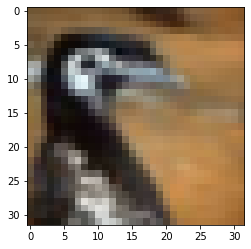

bird


In [0]:
qw=45

print(fore_idx[qw])
imshow(mosaic_list_of_images[qw][fore_idx[qw]])
# print(mosaic_list_of_images[0])
print(classes[mosaic_label[qw]]) 

# imshow(mosaic_list_of_images[13][2])
# print(type(mosaic_list_of_images[1][0]))
# print(mosaic_label)

In [0]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list_of_images, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [0]:
# class Module1(nn.Module):
#   def __init__(self):
#     super(Module1, self).__init__()
#     self.conv1 = nn.Conv2d(3, 6, 5)
#     self.pool = nn.MaxPool2d(2, 2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16 * 5 * 5, 120)
#     self.fc2 = nn.Linear(120, 84)
#     self.fc3 = nn.Linear(84, 10)
#     self.fc4 = nn.Linear(10,1)

#   def forward(self, z):
#     x = torch.zeros([batch,9],dtype=torch.float64)
#     y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
#     x,y = x.to("cuda"),y.to("cuda")
#     for i in range(9):
#       x[:,i] = self.helper(z[:,i])[:,0]
#     x = F.softmax(x,dim=1)   # alphas
    
#     x1 = x[:,0]
#     torch.mul(x1[:,None,None,None],z[:,0])

#     for i in range(9):            
#       x1 = x[:,i]          
#       y = y + torch.mul(x1[:,None,None,None],z[:,i])
#     return y , x 
  
#   def helper(self,x):
#     x = self.pool(F.relu(self.conv1(x)))
#     x = self.pool(F.relu(self.conv2(x)))
#     # x = x.contiguous()
#     # print("x before", x.shape)
#     x = x.view(-1, 16 * 5 * 5)
#     # print("x after", x.shape)
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = F.relu(self.fc3(x))
#     x = self.fc4(x)
#     return x

class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [0]:
# class Module2(nn.Module):
#   def __init__(self):
#     super(Module2, self).__init__()
    
#     self.conv1 = nn.Conv2d(3, 6, 5)
#     self.pool = nn.MaxPool2d(2, 2)
#     self.conv2 = nn.Conv2d(6, 16, 5)
#     self.fc1 = nn.Linear(16 * 5 * 5, 120)
#     self.fc2 = nn.Linear(120, 84)
#     self.fc3 = nn.Linear(84, 10)
#     self.fc4 = nn.Linear(10,3)

#   def forward(self,y):  #z batch of list of 9 images
#     y1 = self.pool(F.relu(self.conv1(y)))
#     y1 = self.pool(F.relu(self.conv2(y1)))
#     # print(y1.shape)
#     y1 = y1.reshape(-1, 16 * 5 * 5)

#     y1 = F.relu(self.fc1(y1))
#     y1 = F.relu(self.fc2(y1))
#     y1 = F.relu(self.fc3(y1))
#     y1 = self.fc4(y1)
#     return y1

class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.module1 = Module1().double()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.fc4 = nn.Linear(10,3)

  def forward(self,z):  #z batch of list of 9 images
    y = torch.zeros([batch,3, 32,32], dtype=torch.float64)
    x = torch.zeros([batch,9],dtype=torch.float64)
    x = x.to("cuda")
    y = y.to("cuda")
    for i in range(9):
        x[:,i] = self.module1.forward(z[:,i])[:,0]

    x = F.softmax(x,dim=1)

    x1 = x[:,0]
    torch.mul(x1[:,None,None,None],z[:,0])

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None,None,None],z[:,i])
      y = y.contiguous()


    y1 = self.pool(F.relu(self.conv1(y)))
    y1 = self.pool(F.relu(self.conv2(y1)))
    y1 = y1.contiguous()
    y1 = y1.reshape(-1, 16 * 5 * 5)

    y1 = F.relu(self.fc1(y1))
    y1 = F.relu(self.fc2(y1))
    y1 = F.relu(self.fc3(y1))
    y1 = self.fc4(y1)
    return y1 , x, y

In [0]:
# where_net = Module1().double()
# where_net = where_net.to("cuda")

In [0]:
# what_net = Module2().double()
# what_net = what_net.to("cuda")

In [0]:
fore_net = Module2().double()
fore_net = fore_net.to("cuda")

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer_where = optim.SGD(where_net.parameters(), lr=0.01, momentum=0.9)
# optimizer_what = optim.SGD(what_net.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.SGD(fore_net.parameters(), lr=0.01, momentum=0.9)
nos_epochs = 150

for epoch in range(nos_epochs):  # loop over the dataset multiple times

  running_loss = 0.0
  cnt=0

  iteration = desired_num // batch
  
  #training data set
  
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    inputs, labels, fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    # zero the parameter gradients
    
    # optimizer_what.zero_grad()
    # optimizer_where.zero_grad()
    optimizer.zero_grad()
    
    # avg_images , alphas = where_net(inputs)
    # avg_images = avg_images.contiguous()
    # outputs = what_net(avg_images)

    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    # optimizer_what.step()
    # optimizer_where.step()
    optimizer.step()
    running_loss += loss.item()
    mini = 40
    if cnt % mini == mini - 1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      running_loss = 0.0
    cnt=cnt+1

print('Finished Training')
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")

[1,    40] loss: 1.106
[1,    80] loss: 1.099
[1,   120] loss: 1.099
[2,    40] loss: 1.099
[2,    80] loss: 1.098
[2,   120] loss: 1.099
[3,    40] loss: 1.099
[3,    80] loss: 1.099
[3,   120] loss: 1.098
[4,    40] loss: 1.099
[4,    80] loss: 1.099
[4,   120] loss: 1.098
[5,    40] loss: 1.099
[5,    80] loss: 1.098
[5,   120] loss: 1.098
[6,    40] loss: 1.098
[6,    80] loss: 1.098
[6,   120] loss: 1.099
[7,    40] loss: 1.098
[7,    80] loss: 1.099
[7,   120] loss: 1.098
[8,    40] loss: 1.098
[8,    80] loss: 1.098
[8,   120] loss: 1.098
[9,    40] loss: 1.098
[9,    80] loss: 1.098
[9,   120] loss: 1.098
[10,    40] loss: 1.098
[10,    80] loss: 1.098
[10,   120] loss: 1.098
[11,    40] loss: 1.097
[11,    80] loss: 1.097
[11,   120] loss: 1.097
[12,    40] loss: 1.096
[12,    80] loss: 1.096
[12,   120] loss: 1.095
[13,    40] loss: 1.094
[13,    80] loss: 1.093
[13,   120] loss: 1.092
[14,    40] loss: 1.090
[14,    80] loss: 1.087
[14,   120] loss: 1.084
[15,    40] loss: 1

In [0]:
torch.save(fore_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/fore_net_epoch"+str(nos_epochs)+"_fg_used"+str(fg_used)+".pt")
# torch.save(what_net.state_dict(),"/content/drive/My Drive/Research/drill_deep_cifar/weights/model_epoch"+str(nos_epochs)+".pt")

In [0]:
# fore_net.load_state_dict(torch.load("/content/drive/My Drive/Research/drill_deep_cifar/weights/fore_net_epoch150_fg_used012.pt"))

In [0]:
test_images =[]        #list of mosaic images, each mosaic image is saved as laist of 9 images
fore_idx_test =[]                   #list of indexes at which foreground image is present in a mosaic image                
test_label=[]                # label of mosaic image = foreground class present in that mosaic
test_set_labels = []
for i in range(10000):
  set_idx = set()
  bg_idx = np.random.randint(0,35000,8)
  set_idx = set(background_label[bg_idx].tolist())
  fg_idx = np.random.randint(0,15000)
  set_idx.add(foreground_label[fg_idx].item())
  fg = np.random.randint(0,9)
  fore_idx_test.append(fg)
  image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
  test_images.append(image_list)
  test_label.append(label)
  test_set_labels.append(set_idx)


In [0]:
test_data = MosaicDataset(test_images,test_label,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [0]:
torch.argmax(alphas[5]), alphas[5]

(tensor(3, device='cuda:0'),
 tensor([4.2632e-04, 1.4221e-02, 1.2932e-02, 8.3964e-01, 5.3271e-02, 1.2786e-02,
         4.5036e-02, 1.4915e-02, 6.7711e-03], device='cuda:0',
        dtype=torch.float64, grad_fn=<SelectBackward>))

###Lets see the % of FTPT, FFPT, FTPF, FFPF for FG classes separetly

In [0]:
table = []
entry_no = 1
train_set = DataLoader( msd,batch_size= batch ,shuffle=False)
fg = [0,1,2]
bg = [3,4,5,6,7,8,9]

# cnt=0
for a in fg :
  count = 0
  correct = 0
  total = 0
  focus_true_pred_true = 0
  focus_false_pred_true = 0
  focus_true_pred_false = 0
  focus_false_pred_false = 0
  argmax_more_than_half = 0
  argmax_less_than_half = 0
  with torch.no_grad():
    for data in train_set:
      inputs, labels , fore_idx = data
      inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
      outputs, alphas, avg_images = fore_net(inputs)

      _, predicted = torch.max(outputs.data, 1)

      for m in range(labels.size(0)):
        # count
        if(count == 30000):
          break
        s = list_set_labels[count]
        # print(count, s, str(a)+str(b1)+str(b2)+str(b3))
        if (a in s ):
          # print(str(a)+str(b1)+str(b2)+str(b3))
          total += 1
          focus = torch.argmax(alphas[m])
          if alphas[m][focus] >= 0.5 :
            argmax_more_than_half += 1
          else:
            argmax_less_than_half += 1

          if(focus == fore_idx[m] and predicted[m] == labels[m]):
              focus_true_pred_true += 1
          elif(focus != fore_idx[m] and predicted[m] == labels[m]):
            focus_false_pred_true += 1
          elif(focus == fore_idx[m] and predicted[m] != labels[m]):
            focus_true_pred_false += 1
          elif(focus != fore_idx[m] and predicted[m] != labels[m]):
            focus_false_pred_false += 1
        
        count += 1
      
    correct += (predicted == labels).sum().item()  
    entry = [entry_no,'fg = '+str(a) , 'bg = all_except_fg', total]
    if total == 0:
      entry.append(0)
      entry.append(0)
      entry.append(0)
      entry.append(0)
    else:
      entry.append((100 * focus_true_pred_true / total))
      entry.append( (100 * focus_false_pred_true / total))
      entry.append( ( 100 * focus_true_pred_false / total))
      entry.append( ( 100 * focus_false_pred_false / total))
    entry.append( argmax_more_than_half)
    table.append(entry)
    entry_no += 1

print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'] ) )


  S.No.  fg_class    bg_class              data_points    FTPT %     FFPT %      FTPF %     FFPF %     avg_img > 0.5
-------  ----------  ------------------  -------------  ---------  ---------  ----------  ---------  ---------------
      1  fg = 0      bg = all_except_fg           9833    90.359      9.5088  0.0508492   0.0813587             9086
      2  fg = 1      bg = all_except_fg          10076    95.2858     4.605   0.0297737   0.0793966             9764
      3  fg = 2      bg = all_except_fg          10091    51.3329    48.3698  0.00990982  0.287385              4628


###Lets see the % of FTPT, FFPT, FTPF, FFPF for FG classes with 3 bg classes separetly


In [0]:
from tabulate import tabulate
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

train_set = DataLoader( msd,batch_size= batch ,shuffle=False)
with torch.no_grad():
  for data in train_set:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      count += 1
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 30000 train images: %d %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)
print(count)

print("="*100)
table = []
entry = [1,'fg = 0,1,2','bg = 3,4,5,6,7,8,9',30000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)
table.append(entry)

print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 30000 train images: 99 %
total correct 29946
total train set images 30000
focus_true_pred_true 23666 =============> FTPT : 78 %
focus_false_pred_true 6280 =============> FFPT : 20 %
focus_true_pred_false 9 =============> FTPF : 0 %
focus_false_pred_false 45 =============> FFPF : 0 %
argmax_more_than_half 23478
argmax_less_than_half 6522
30000
  S.No.  fg_class    bg_class              data_points     FTPT     FFPT    FTPF    FFPF    avg_img > 0.5
-------  ----------  ------------------  -------------  -------  -------  ------  ------  ---------------
      1  fg = 0,1,2  bg = 3,4,5,6,7,8,9          30000  78.8867  20.9333    0.03    0.15            23478


In [228]:
entry_no = 2
train_set = DataLoader( msd,batch_size= batch ,shuffle=False)
fg = [0,1,2]
bg = [3,4,5,6,7,8,9]

# cnt=0
for a in fg :
  for i in range(5):
    b1 = bg[i]
    for j in range(i+1 , 6): 
      b2 = bg[j]
      for k in range(j+1 , 7):
        b3 = bg[k]
        # cnt+=1
        # print( cnt , a,b1,b2,b3)
        count = 0
        correct = 0
        total = 0
        focus_true_pred_true = 0
        focus_false_pred_true = 0
        focus_true_pred_false = 0
        focus_false_pred_false = 0
        argmax_more_than_half = 0
        argmax_less_than_half = 0
        with torch.no_grad():
          for data in train_set:
            inputs, labels , fore_idx = data
            inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
            outputs, alphas, avg_images = fore_net(inputs)

            _, predicted = torch.max(outputs.data, 1)

            for m in range(labels.size(0)):
              # count
              if(count == 30000):
                break
              s = list_set_labels[count]
              # print(count, s, str(a)+str(b1)+str(b2)+str(b3))
              if (a in s and b1 in s and b2 in s and b3 in s):
                # print(str(a)+str(b1)+str(b2)+str(b3))
                total += 1
                focus = torch.argmax(alphas[m])
                if alphas[m][focus] >= 0.5 :
                  argmax_more_than_half += 1
                else:
                  argmax_less_than_half += 1

                if(focus == fore_idx[m] and predicted[m] == labels[m]):
                    focus_true_pred_true += 1
                elif(focus != fore_idx[m] and predicted[m] == labels[m]):
                  focus_false_pred_true += 1
                elif(focus == fore_idx[m] and predicted[m] != labels[m]):
                  focus_true_pred_false += 1
                elif(focus != fore_idx[m] and predicted[m] != labels[m]):
                  focus_false_pred_false += 1
              
              count += 1
            
          correct += (predicted == labels).sum().item()  
          entry = [entry_no,'fg = '+str(a) , 'bg = '+ str(b1)+',' + str(b2)+',' + str(b3), total]
          if total == 0:
            entry.append(0)
            entry.append(0)
            entry.append(0)
            entry.append(0)
          else:
            entry.append((100 * focus_true_pred_true / total))
            entry.append( (100 * focus_false_pred_true / total))
            entry.append( ( 100 * focus_true_pred_false / total))
            entry.append( ( 100 * focus_false_pred_false / total))
          entry.append( argmax_more_than_half)
          table.append(entry)
          entry_no += 1

print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'] ) )


  S.No.  fg_class    bg_class              data_points    FTPT %     FFPT %     FTPF %     FFPF %     avg_img > 0.5
-------  ----------  ------------------  -------------  ---------  ---------  ---------  ---------  ---------------
      1  fg = 0,1,2  bg = 3,4,5,6,7,8,9          30000    78.8867   20.9333   0.03       0.15                 23478
      2  fg = 0      bg = 3,4,5                   3117    89.9583    9.91338  0.0641643  0.0641643             2869
      3  fg = 0      bg = 3,4,6                   3132    90.3576    9.45083  0.063857   0.127714              2882
      4  fg = 0      bg = 3,4,7                   3148    89.9936    9.84752  0.0635324  0.0952986             2907
      5  fg = 0      bg = 3,4,8                   3125    89.408    10.432    0.096      0.064                 2865
      6  fg = 0      bg = 3,4,9                   3210    90.1869    9.65732  0.0623053  0.0934579             2948
      7  fg = 0      bg = 3,5,6                   3069    90.7136    9.1

In [0]:
col = ['configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5']
# df_train = pd.DataFrame()
import csv
with open("/content/drive/My Drive/Research/drill_deep_cifar/train"+str(fg_used)+".csv", "w", newline ='') as f:
  thewriter = csv.writer(f)
  row = len(table)
  thewriter.writerow(['S.No.','configuration','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'])
  for i in range(row):
    thewriter.writerow(table[i])

In [229]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    outputs, alphas, avg_images = fore_net(inputs)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 train images: %d %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %d %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %d %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %d %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %d %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half",argmax_more_than_half)
print("argmax_less_than_half",argmax_less_than_half)

print("="*100)
table = []
entry = [1,'fg = 0,1,2','bg = 3,4,5,6,7,8,9',10000]
entry.append((100 * focus_true_pred_true / total))
entry.append( (100 * focus_false_pred_true / total))
entry.append( ( 100 * focus_true_pred_false / total))
entry.append( ( 100 * focus_false_pred_false / total))
entry.append( argmax_more_than_half)
table.append(entry)

print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT', 'FFPT', 'FTPF', 'FFPF', 'avg_img > 0.5'] ) )


Accuracy of the network on the 10000 train images: 86 %
total correct 8676
total train set images 10000
focus_true_pred_true 7126 =============> FTPT : 71 %
focus_false_pred_true 1550 =============> FFPT : 15 %
focus_true_pred_false 363 =============> FTPF : 3 %
focus_false_pred_false 961 =============> FFPF : 9 %
argmax_more_than_half 7355
argmax_less_than_half 2645
  S.No.  fg_class    bg_class              data_points    FTPT    FFPT    FTPF    FFPF    avg_img > 0.5
-------  ----------  ------------------  -------------  ------  ------  ------  ------  ---------------
      1  fg = 0,1,2  bg = 3,4,5,6,7,8,9          10000   71.26    15.5    3.63    9.61             7355


In [230]:
entry_no = 2
#usinfg test_loader
fg = [0,1,2]
bg = [3,4,5,6,7,8,9]

# cnt=0
for a in fg :
  for i in range(5):
    b1 = bg[i]
    for j in range(i+1 , 6): 
      b2 = bg[j]
      for k in range(j+1 , 7):
        b3 = bg[k]
        # cnt+=1
        # print( cnt , a,b1,b2,b3)
        count = 0
        correct = 0
        total = 0
        focus_true_pred_true = 0
        focus_false_pred_true = 0
        focus_true_pred_false = 0
        focus_false_pred_false = 0
        argmax_more_than_half = 0
        argmax_less_than_half = 0
        with torch.no_grad():
          for data in test_loader:
            inputs, labels , fore_idx = data
            inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
            outputs, alphas, avg_images = fore_net(inputs)

            _, predicted = torch.max(outputs.data, 1)

            for m in range(labels.size(0)):
              # count
              if(count == 10000):
                break
              s = test_set_labels[count]
              # print(count, s, str(a)+str(b1)+str(b2)+str(b3))
              if (a in s and b1 in s and b2 in s and b3 in s):
                # print(str(a)+str(b1)+str(b2)+str(b3))
                total += 1
                focus = torch.argmax(alphas[m])
                if alphas[m][focus] >= 0.5 :
                  argmax_more_than_half += 1
                else:
                  argmax_less_than_half += 1

                if(focus == fore_idx[m] and predicted[m] == labels[m]):
                    focus_true_pred_true += 1
                elif(focus != fore_idx[m] and predicted[m] == labels[m]):
                  focus_false_pred_true += 1
                elif(focus == fore_idx[m] and predicted[m] != labels[m]):
                  focus_true_pred_false += 1
                elif(focus != fore_idx[m] and predicted[m] != labels[m]):
                  focus_false_pred_false += 1
              
              count += 1
            
          correct += (predicted == labels).sum().item()  
          entry = [entry_no,'fg = '+str(a) , 'bg = '+ str(b1)+',' + str(b2)+',' + str(b3), total]
          if total == 0:
            entry.append(0)
            entry.append(0)
            entry.append(0)
            entry.append(0)
          else:
            entry.append((100 * focus_true_pred_true / total))
            entry.append( (100 * focus_false_pred_true / total))
            entry.append( ( 100 * focus_true_pred_false / total))
            entry.append( ( 100 * focus_false_pred_false / total))
          entry.append( argmax_more_than_half)
          table.append(entry)
          entry_no += 1

print(tabulate(table, headers=['S.No.', 'fg_class','bg_class','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'] ) )


  S.No.  fg_class    bg_class              data_points    FTPT %     FFPT %     FTPF %     FFPF %     avg_img > 0.5
-------  ----------  ------------------  -------------  ---------  ---------  ---------  ---------  ---------------
      1  fg = 0,1,2  bg = 3,4,5,6,7,8,9          10000    71.26    15.5         3.63       9.61                7355
      2  fg = 0      bg = 3,4,5                   1049    80.3622   2.76454     6.29171   10.5815               893
      3  fg = 0      bg = 3,4,6                   1049    81.2202   2.66921     6.00572   10.1049               897
      4  fg = 0      bg = 3,4,7                   1043    79.8658   2.78044     6.71141   10.6424               883
      5  fg = 0      bg = 3,4,8                   1059    82.2474   3.49386     4.53258    9.72616              910
      6  fg = 0      bg = 3,4,9                   1067    81.4433   2.7179      6.27929    9.55951              912
      7  fg = 0      bg = 3,5,6                   1032    80.7171   2.61

In [0]:
col = ['fg_class','bg_class','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5']

In [0]:
import csv
with open("/content/drive/My Drive/Research/drill_deep_cifar/test"+str(fg_used)+".csv", "w", newline ='') as f:
  thewriter = csv.writer(f)
  row = len(table)
  thewriter.writerow(['S.No.','fg_class','bg_class','data_points','FTPT % ', 'FFPT % ', 'FTPF % ', 'FFPF % ', 'avg_img > 0.5'])
  for i in range(row):
    thewriter.writerow(table[i])

In [0]:
test = pd.read_csv("/content/drive/My Drive/Research/drill_deep_cifar/test012.csv")
test.head()

,S.No.,fg_class,bg_class,data_points,FTPT %,FFPT %,FTPF %,FFPF %,avg_img > 0.5
0,1,"fg = 0,1,2","bg = 3,4,5,6,7,8,9",10000,71.260000,15.500000,3.630000,9.610000,7355
1,2,fg = 0,"bg = 3,4,5",1049,80.362250,2.764538,6.291706,10.581506,893
2,3,fg = 0,"bg = 3,4,6",1049,81.220210,2.669209,6.005720,10.104862,897
3,4,fg = 0,"bg = 3,4,7",1043,79.865772,2.780441,6.711409,10.642378,883
4,5,fg = 0,"bg = 3,4,8",1059,82.247403,3.493862,4.532578,9.726157,910


In [0]:
test = np.array(test)

In [0]:
len(test)

106

In [0]:
ftpt_full = test[0][4]
ffpt_full = test[0, 5]
ftpf_full = test[0, 6]
ffpf_full = test[0][7]
ftpt_full, ffpt_full, ftpf_full, ffpf_full

(71.26, 15.5, 3.63, 9.61)

In [0]:
id0 = test[1:35, 2]
ftpt0 = test[1:35, 4]
ffpt0 = test[1:35, 5]
ftpf0 = test[1:35, 6]
ffpf0 = test[1:35, 7]
ftpt0 , id0

(array([80.3622497616778, 81.22020972354623, 79.86577181208054,
        82.24740321057602, 81.44329896907216, 80.71705426356587,
        78.94736842105263, 82.35849056603773, 80.14842300556586,
        80.01921229586934, 82.23300970873788, 82.82732447817838,
        81.22020972354623, 80.48780487804878, 82.00913242009132,
        79.76878612716763, 78.56450048496605, 81.56899810964083,
        79.45590994371481, 79.4200187090739, 80.45112781954887,
        81.26721763085399, 79.49673811742777, 80.27777777777777, 80.625,
        78.44080846968238, 81.00289296046287, 80.03802281368822,
        79.66260543580131, 78.56485740570378, 80.07246376811594,
        78.88784165881246, 80.05540166204986, 80.14842300556586],
       dtype=object),
 array(['bg = 3,4,5', 'bg = 3,4,6', 'bg = 3,4,7', 'bg = 3,4,8',
        'bg = 3,4,9', 'bg = 3,5,6', 'bg = 3,5,7', 'bg = 3,5,8',
        'bg = 3,5,9', 'bg = 3,6,7', 'bg = 3,6,8', 'bg = 3,6,9',
        'bg = 3,7,8', 'bg = 3,7,9', 'bg = 3,8,9', 'bg = 4,5,6',


In [0]:
id1 = test[36:70, 2]
ftpt1 = test[36:70, 4]
ffpt1 = test[36:70, 5]
ftpf1 = test[36:70, 6]
ffpf1 = test[36:70, 7]

id2 = test[71:105, 2]
ftpt2 = test[71:105, 4]
ffpt2 = test[71:105, 5]
ftpf2 = test[71:105, 6]
ffpf2 = test[71:105, 7]

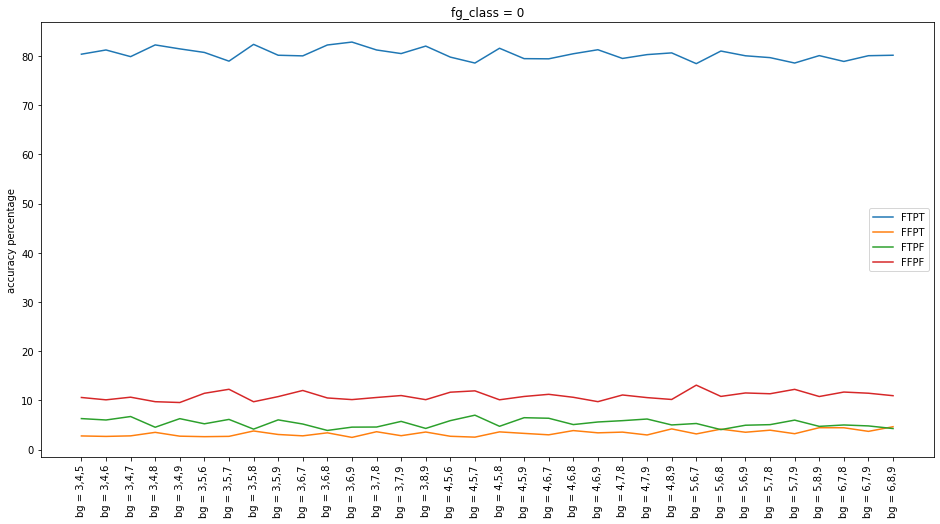

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0, ftpt0,label = 'FTPT')
plt.plot(id0, ffpt0 , label = 'FFPT')
plt.plot(id0, ftpf0, label = 'FTPF')
plt.plot(id0, ffpf0, label = 'FFPF')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('fg_class = 0')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/fg_class0.pdf", bbox_inches='tight')

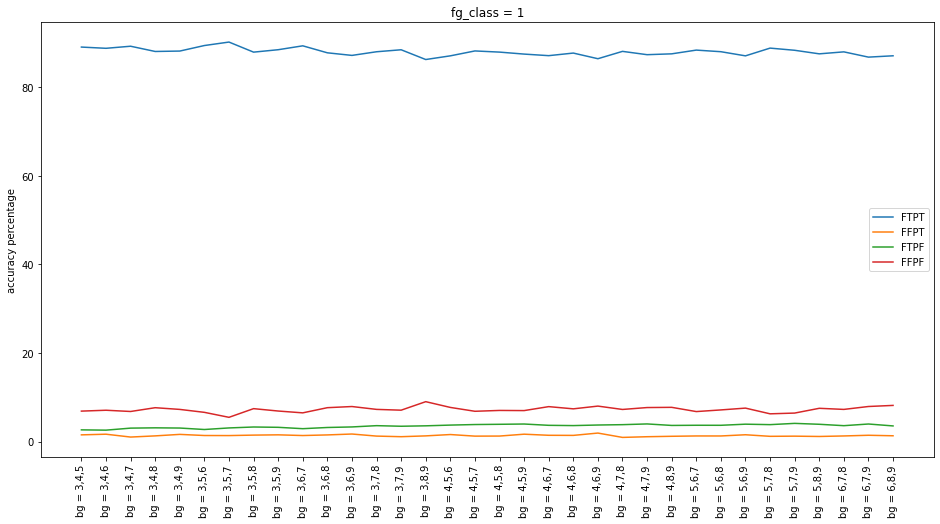

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0, ftpt1,label = 'FTPT')
plt.plot(id0, ffpt1 , label = 'FFPT')
plt.plot(id0, ftpf1, label = 'FTPF')
plt.plot(id0, ffpf1, label = 'FFPF')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('fg_class = 1')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/fg_class1.pdf", bbox_inches='tight')

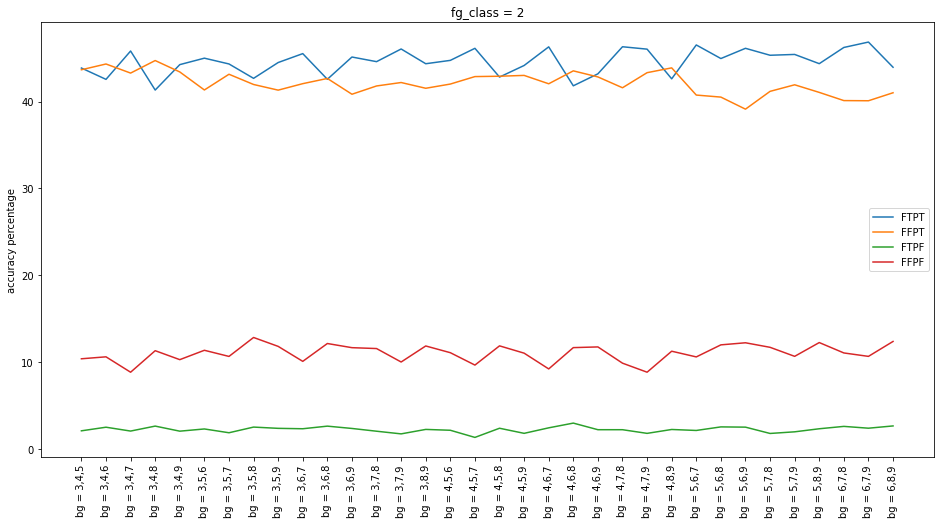

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0, ftpt2,label = 'FTPT')
plt.plot(id0, ffpt2 , label = 'FFPT')
plt.plot(id0, ftpf2, label = 'FTPF')
plt.plot(id0, ffpf2, label = 'FFPF')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('fg_class = 2')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/fg_class2.pdf", bbox_inches='tight')

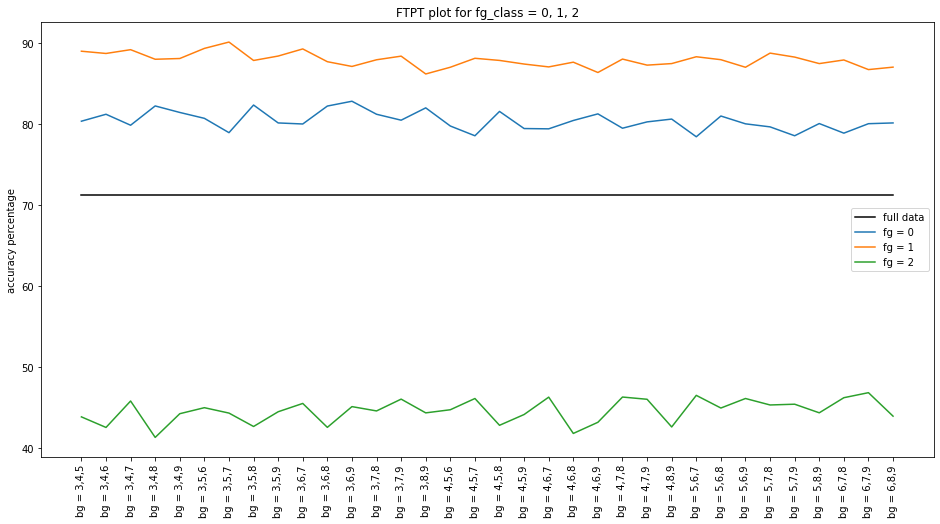

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0,np.ones(len(id0))*ftpt_full, color='black', label = 'full data')
plt.plot(id0, ftpt0, label = 'fg = 0')
plt.plot(id0, ftpt1, label = 'fg = 1')
plt.plot(id0, ftpt2, label = 'fg = 2')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('FTPT plot for fg_class = 0, 1, 2')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/ftpt_plot.pdf", bbox_inches='tight')

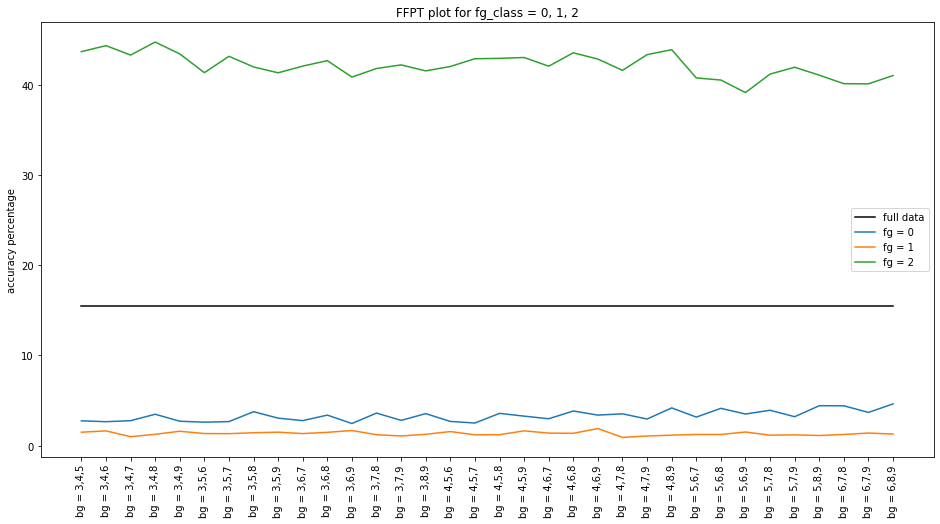

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0,np.ones(len(id0))*ffpt_full, color='black', label = 'full data')
plt.plot(id0, ffpt0, label = 'fg = 0')
plt.plot(id0, ffpt1, label = 'fg = 1')
plt.plot(id0, ffpt2, label = 'fg = 2')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('FFPT plot for fg_class = 0, 1, 2')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/ffpt_plot.pdf", bbox_inches='tight')

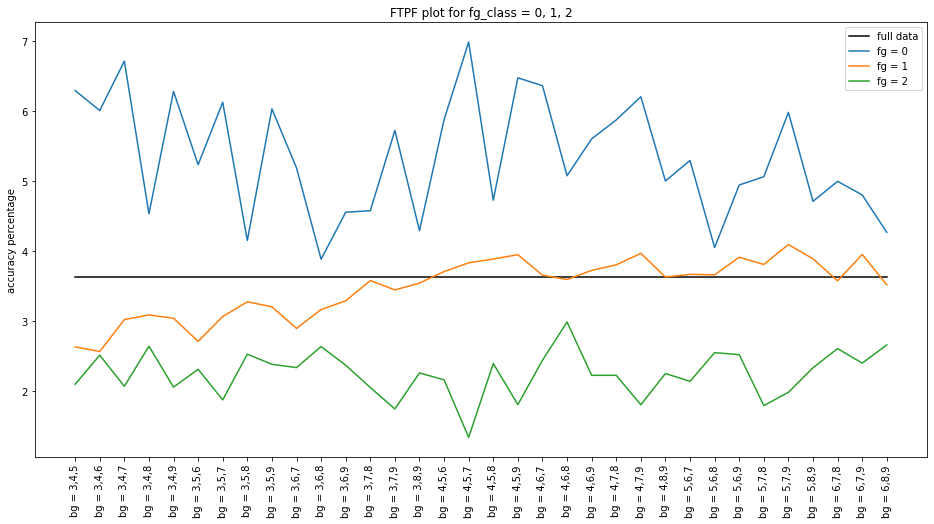

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0,np.ones(len(id0))*ftpf_full, color='black', label = 'full data')
plt.plot(id0, ftpf0, label = 'fg = 0')
plt.plot(id0, ftpf1, label = 'fg = 1')
plt.plot(id0, ftpf2, label = 'fg = 2')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('FTPF plot for fg_class = 0, 1, 2')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/ftpf_plot.pdf", bbox_inches='tight')

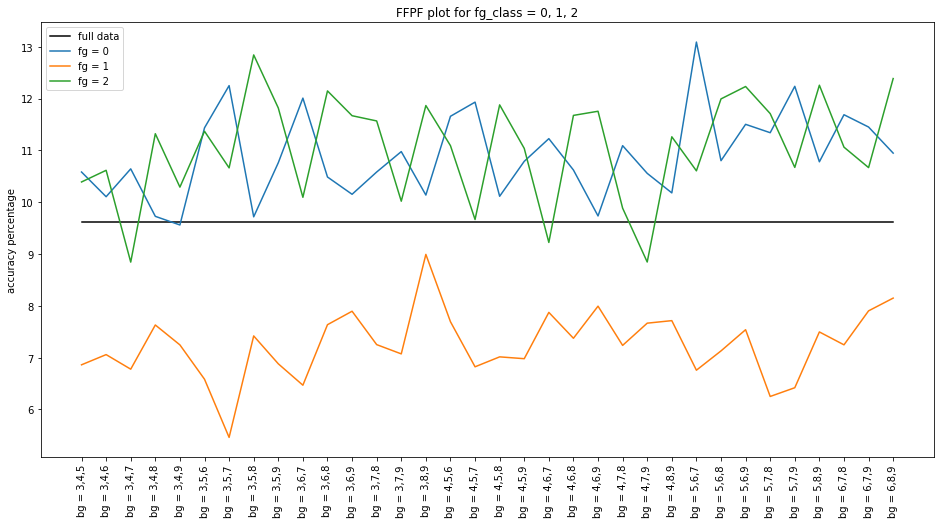

In [0]:
fig = plt.figure( figsize= (16,8))
plt.plot(id0,np.ones(len(id0))*ffpf_full, color='black', label = 'full data')
plt.plot(id0, ffpf0, label = 'fg = 0')
plt.plot(id0, ffpf1, label = 'fg = 1')
plt.plot(id0, ffpf2, label = 'fg = 2')
plt.xticks(id0, rotation=90)
plt.legend()
plt.title('FFPF plot for fg_class = 0, 1, 2')
plt.ylabel('accuracy percentage')
plt.show()
fig.savefig("/content/drive/My Drive/Research/drill_deep_cifar/plots/fg_012/ffpf_plot.pdf", bbox_inches='tight')